In [1]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp


In [2]:
# setting pararmeters
a = 1
b = 0.2
d= 0.1

In [3]:
# defining a system of 2 ODEs (predator-prey equations)
def PredPrey(t,Z,a,b,d):
    x = Z[0]
    y = Z[1]
    return [x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)]

In [4]:
# Define a system of ODEs (predator-prey equations)

#def fun(X,t,args=(a,b,d)):
    #x = X[0]
    #y = X[-1]
    #return np.array([x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)])

In [5]:
#time = np.arange(0,100,0.1)
#sol = solve_ode_system(fun,0.1,0,[1,1],time, rk4_solve_step,args=(a,b,d))

In [6]:
# solving the equations
sol = solve_ivp(PredPrey, (0,100),(1,1), args=(a,b,d), rtol=1e-6)

In [7]:
#fig=plt.figure(figsize=(8,6)) 
#plt.plot(time,[state[0] for state in sol])
#plt.plot(time,[state[1] for state in sol])
#plt.legend(['Predator','Prey'])
#plt.xlabel('t')
#plt.ylabel('Number of Prey and Predators')
#plt.title('Predator-Prey equations using Runge-Kutta method')


Text(0.5, 1.0, 'Predator-Prey equations using Runge-Kutta method')

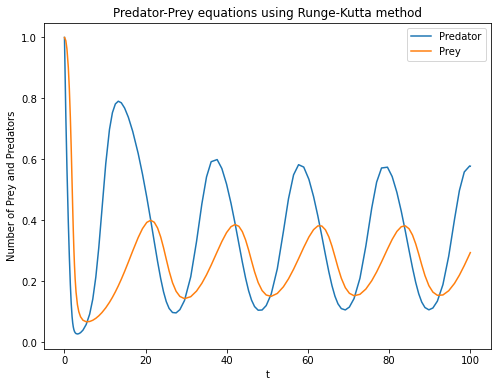

In [8]:
# plotting a graph of the solutions
fig=plt.figure(figsize=(8,6)) 
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.legend(['Predator','Prey'])
plt.xlabel('t')
plt.ylabel('Number of Prey and Predators')
plt.title('Predator-Prey equations using Runge-Kutta method')

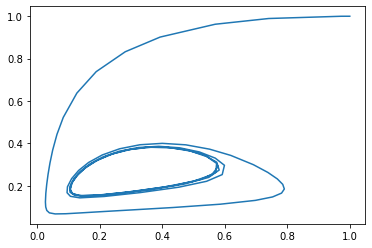

In [9]:
# 
plt.plot(sol.y[0], sol.y[1])
#plt.plot([state[0] for state in sol],[state[1] for state in sol])

In [10]:
#When b>0.26 over a long-time limit there is convergence 
#When b<0.26 over a long-time limit the amplitude increasescv 

In [11]:
#Determining an appropriate phase-condition for the limit cycle
#x*(1-x) - (a*x*y)/(d+x) = 0

In [12]:
#Construct the shooting root-finding problem
#def shooting(u0, function, args):
    #u, T = u0[:-1], u0[-1]
    #sol = solve_ode_system(function,0.1,0,u,np.arange(0,T,0.1), rk4_solve_step,args=args)
    #final_states = sol[-1]
    #phase_condition = np.array([function(u,T,(args[0],args[1],args[2]))[0]])
    #return np.concatenate((u-final_states, phase_condition))

In [13]:
  #find the roots of g with an initial guess
#from scipy.optimize import fsolve
#root = fsolve(shooting,[1.5,1.5,20],args = (fun, (a,b,d)))
#root

In [14]:
def phase_condition_func(func, u, T, args):
    return func(T,u,*args)[0]

In [15]:
#Construct the shooting root-finding problem
def shooting(u0, function, phase_condition,args):
    """
    A function that uses numerical shooting to find limit cycles of
    a specified ODE.

    Parameters
    ----------
     u0 : numpy.array
        An initial guess at the initial values for the limit cycle.
    
    fun : function
        The ODE to apply shooting to. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
    
    phase_condition: function
                    The phase condition for the limit cycle.
        
    args: tuple
        arguments passed for the numerical shooting

    Returns
    -------
    Returns a numpy.array containing the corrected initial values
    for the limit cycle. If the numerical root finder failed, the
    returned array is empty.
    """
    u, T = u0[:-1], u0[-1]
    sol = solve_ivp(function, (0,T), u, args = args, rtol = 1e-6)
    final_states = sol.y[:,-1]
    phase = np.array([phase_condition(function,u,T,args)])
    #phase_condition1 = np.array([function(T,u,args[0],args[1],args[2])[0]])
    return np.concatenate((u-final_states, phase))

In [16]:
shooting([1.5,1.5,100], PredPrey, phase_condition_func, args =(a,b,d))

array([ 0.92170558,  1.21271047, -2.15625   ])

In [17]:
root = fsolve(shooting,[1.5,1.5,20],args = (PredPrey, phase_condition_func, (a,b,d)))
root

array([ 0.57787432,  0.28614816, 20.81687488])

Text(0.5, 1.0, 'Predator-Prey equations using Runge-Kutta method for one periodic orbit')

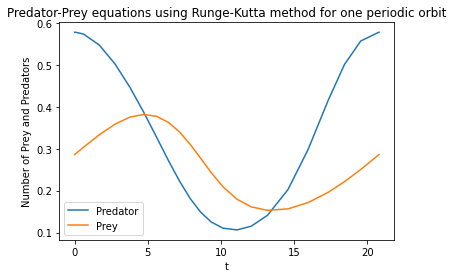

In [18]:
#plot the solution for one periodic orbit
sol = solve_ivp(PredPrey, (0,root[2]), root[:2], args = (a,b,d), rtol = 1e-10)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.legend(['Predator','Prey'])
plt.xlabel('t')
plt.ylabel('Number of Prey and Predators')
plt.title('Predator-Prey equations using Runge-Kutta method for one periodic orbit')

In [19]:
#plot the solution for one periodic orbit
#fig=plt.figure(figsize=(8,6)) 
#sol = solve_ode_system(fun,0.1,0,root[:2],np.arange(0,root[2],0.1), rk4_solve_step,args=(a,b,d))
#plt.plot(np.arange(0,root[2],0.1),[state[0] for state in sol])
#plt.plot(np.arange(0,root[2],0.1),[state[-1] for state in sol])
#plt.legend(['Predator','Prey'])
#plt.xlabel('t')
#plt.ylabel('Number of Prey and Predators')
#plt.title('Predator-Prey equations using Runge-Kutta method for one periodic orbit')

In [20]:
# Attempting to generalise the code
# Improvements:
# adjust code such that user can pass the phase-condition
# make adjustments so that it's more general for passing arguments

In [21]:
#def fun(X,t,args=(a,b,d)):
    #x = X[0]
    #y = X[-1]
    #return np.array([x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)])

In [22]:
# define the varaibles
m = 8
n = 30
c = 8/3

In [23]:
# define a system of 3 first order ODE's 
def system2(t,Z,m,n,c):
    x, y, z = Z[0], Z[1], Z[2]
    xdot = -m*x + m*y
    ydot = n*x + y - x*z
    zdot = x*y - c*z
    return [xdot,ydot,zdot]

In [24]:
# define a system of 3 first order ODE's 
def system(Z,t,args=(m,n,c)):
    x, y, z = Z[0], Z[1], Z[2]
    xdot = -m*x + m*y
    ydot = n*x + y - x*z
    zdot = x*y - c*z
    return np.array([xdot,ydot,zdot])

In [25]:
#Generalising the code so that you can use arbitrary differential equations of arbitrary dimension
#def shooting_system2(u0, function, args):
    #u, T = u0[:-1], u0[-1]
    #sol = solve_ivp(function, (0,T), u, args = args, rtol = 1e-6)
    #final_states = sol.y[:,-1]
    #phase_condition = np.array([function(T,u,args[0], args[1],args[2])[0]])
    #return np.concatenate((u-final_states, phase_condition))#

In [26]:
#Generalising the code so that you can use arbitrary differential equations of arbitrary dimension
#def shooting_system(u0, function, args):
    #u, T = u0[:-1], u0[-1]
    #sol = solve_ode_system(function,0.001,0,u,np.arange(0,T,0.001), rk4_solve_step,args=args)
    #final_states = sol[-1]
    #phase_condition = np.array([function(u,T, (args[0], args[1],args[2]))[0]])
    #return np.concatenate((u-final_states, phase_condition))

In [27]:
root = fsolve(shooting,[-1,0,1,10],args = (system2,phase_condition_func,(m,n,c)))
root

/Users/theabarnes/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([-1.51318644, -1.51408021,  0.68078848, 11.36822184])

In [28]:
#fig=plt.figure(figsize=(8,6)) 
#sol = solve_ode_system(system,0.001,0,root[:-1],np.arange(0,root[-1],0.001), rk4_solve_step,args=(m,n,c))
#plt.plot(np.arange(0,root[-1],0.001),[state[0] for state in sol])
#plt.plot(np.arange(0,root[-1],0.001),[state[1] for state in sol])
#plt.plot(np.arange(0,root[-1],0.001),[state[-1] for state in sol])
#plt.legend(['x(t)','y(t)','z(t)'])
#plt.xlabel('t')
#plt.ylabel('')
#plt.title('Solution of system of three first-order ODEs')

Text(0.5, 1.0, 'Solution of system of three first-order ODEs')

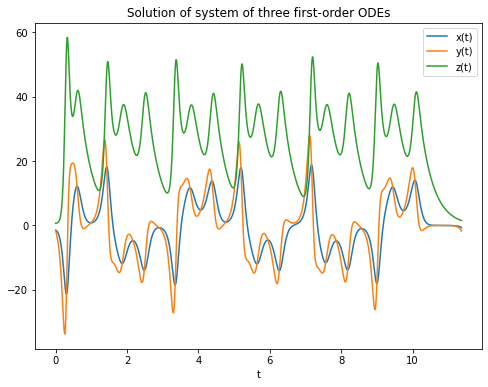

In [29]:
#plot the solution for one periodic orbit
fig=plt.figure(figsize=(8,6))
sol = solve_ivp(system2, (0,root[-1]), root[:-1], args = (m,n,c), rtol = 1e-6)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.legend(['x(t)','y(t)','z(t)'])
plt.xlabel('t')
plt.ylabel('')
plt.title('Solution of system of three first-order ODEs')